# Plot each distribution of the [Distributions.jl package](http://distributionsjl.readthedocs.io).

#### TODO:
 * introspect args and do a plot per multiple values (probably just 0, 0.5 and 1) per arg
 * find normalization factor of distribution (the multiplicative factor that ensures that the area under the density—the probability of something in the domain occurring— equals 1). This normalization factor is outside the kernel of the distribution.
 * generate an HTML file cleaned from Jupyter clutter
 * import markdown from README.md instead of duplicate header

In [6]:
using Distributions

In [7]:
# Get list of distributions from exported functions from module Distributions.
d_names = names(Distributions)
# Every module has a function named `eval` - let's filter that out.
d_names = filter(x -> x != "eval", d_names)
# Heuristic: Distribution functions all start with a capital letter.
startsWithCapital(s) = ismatch(r"^[A-Z].*$", string(s))
d_names = filter(s -> startsWithCapital(s), d_names);
print("$(length(d_names)) functions were found.")

124 functions were found.

In [8]:
using Plots
pyplot()
using StatPlots

/Users/cmey/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [9]:
# Generate a list where each entry tells how many arguments to pass to the ctor.
function list_num_args_in_ctors(d)
    d_method = getfield(Distributions, d)
    num_args_in_ctors = []
    for method in methods(d_method)
    #     println(method)
        r = Regex("^.*" * string(d) * ".*\\((.*)\\).*\$")
    #     println(r)
        m = match(r, string(method))
        if nothing == m
            continue
        end
    #     println(m.captures)
        @assert 1 == length(m.captures)
        c = m.captures[1]
        L = length(filter(x -> !isempty(x), split(c, ',')))
        push!(num_args_in_ctors, L)
    end
    return sort(unique(num_args_in_ctors))
end
# Demo:
println(methods(Distributions.Normal))
list_num_args_in_ctors(:Normal)

# 6 methods for generic function "(::Type)":


(::Type{Distributions.Normal})() at /Users/cmey/.julia/v0.5/Distributions/src/univariate/continuous/normal.jl:36
(::Type{Distributions.Normal})(μ::Integer, σ::Integer) at /Users/cmey/.julia/v0.5/Distributions/src/univariate/continuous/normal.jl:34
(::Type{Distributions.Normal}){T<:Real}(μ::T, σ::T) at /Users/cmey/.julia/v0.5/Distributions/src/univariate/continuous/normal.jl:32
(::Type{Distributions.Normal})(μ::Real) at /Users/cmey/.julia/v0.5/Distributions/src/univariate/continuous/normal.jl:35
(::Type{Distributions.Normal})(μ::Real, σ::Real) at /Users/cmey/.julia/v0.5/Distributions/src/univariate/continuous/normal.jl:33
(::Type{T}){T}(arg) at sysimg.jl:53


3-element Array{Any,1}:
 0
 1
 2


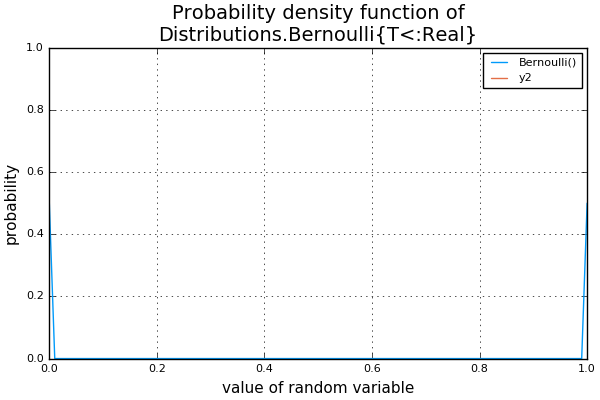


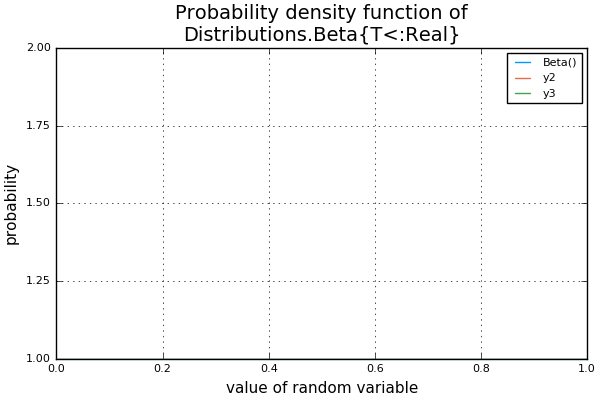

Could not plot the default Distributions.AbstractMixtureModel{VF<:Distributions.VariateForm,VS<:Distributions.ValueSupport,C<:Distributions.Distribution}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.AbstractMvNormal: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not create Distributions.Arcsine{T<:Real} (1, 11): ArgumentError("Arcsine: the condition a < b is not satisfied.").
Arcsine: the condition a < b is not satisfied..


/Users/cmey/.julia/v0.5/Conda/deps/usr/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'Helvetica'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Could not plot the default Distributions.BetaBinomial{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).



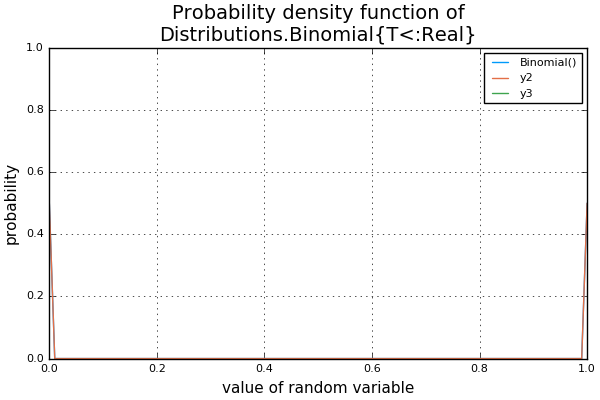


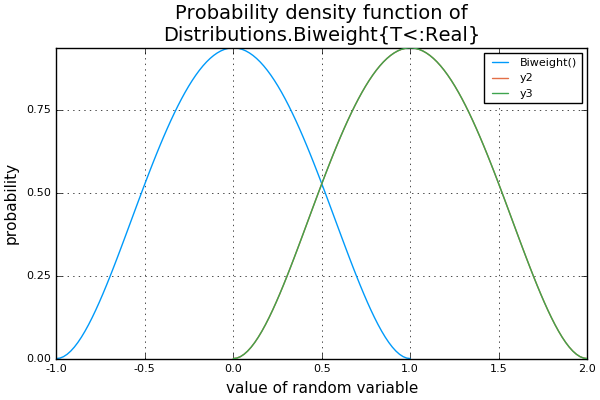

Could not plot the default Distributions.BetaPrime{T<:Real}: DivideError().



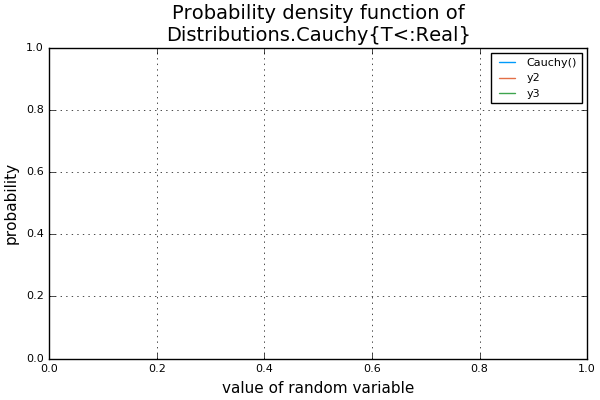

Could not create Distributions.Categorical{T<:Real} (1, 11): MethodError(Distributions.Categorical{T<:Real},(1,1)).
Could not plot the default Distributions.Chi{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Chisq{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).



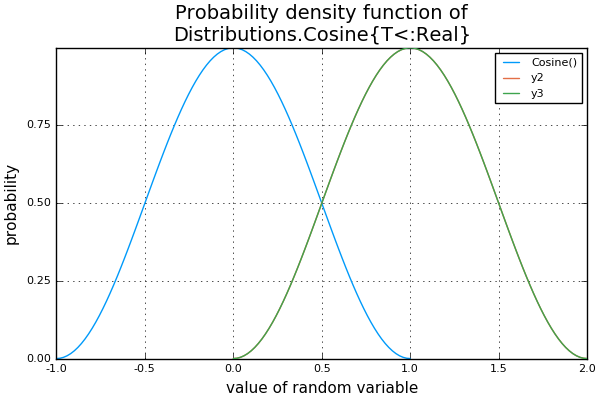

Could not plot the default Distributions.Continuous: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Continuous,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Continuous,).
Could not plot the default Distributions.Distribution{F<:Distributions.VariateForm,Distributions.Continuous}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Distribution{Distributions.Matrixvariate,Distributions.Continuous}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Distribution{Distributions.Multivariate,Distributions.Continuous}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Distribution{Distributions.Univariate,Distributions.Continuous}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Array{Float64,1}}: BoundsError(RecipesBase


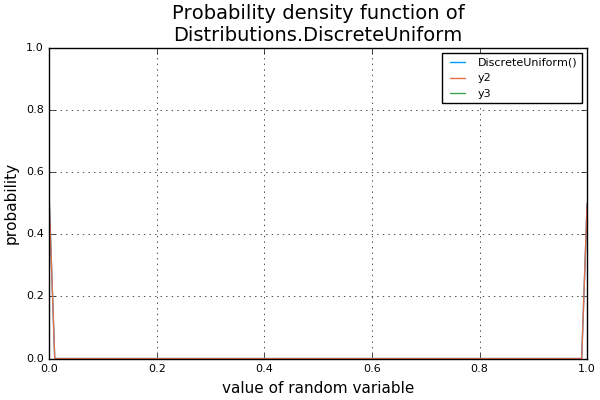

Could not plot the default Distributions.Discrete: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Discrete,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Discrete,).
Could not plot the default Distributions.Distribution{F<:Distributions.VariateForm,Distributions.Discrete}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Distribution{Distributions.Matrixvariate,Distributions.Discrete}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Distribution{Distributions.Multivariate,Distributions.Discrete}: BoundsError(RecipesBase.RecipeData[],(1,)).



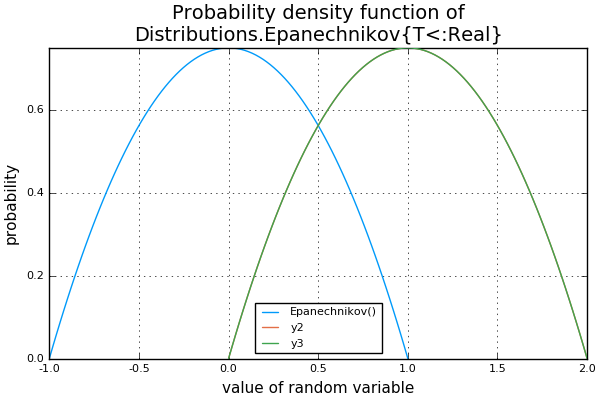

Could not plot the default Distributions.Distribution{Distributions.Univariate,Distributions.Discrete}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Distribution{F<:Distributions.VariateForm,S<:Distributions.ValueSupport}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Gumbel{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.EdgeworthMean{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.EdgeworthSum{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.EdgeworthZ{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSup


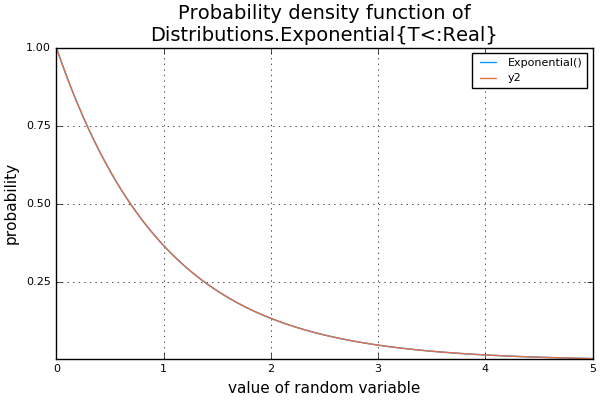

Could not create a default Distributions.Erlang{T<:Real}: MethodError(Distributions.Erlang{T<:Real},(1.0,1.0)).
Could not plot the default Distributions.Estimator{D<:Distributions.Distribution}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.FDist{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.FisherNoncentralHypergeometric{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).



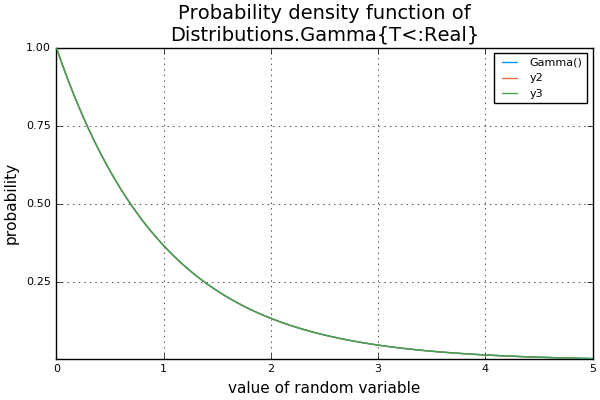

Could not plot the default Distributions.Frechet{T<:Real}: DivideError().
Could not plot the default Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.MvNormalCanon{Float64,PDMats.PDMat{Float64,Array{Float64,2}},Array{Float64,1}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.GeneralizedExtremeValue{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).



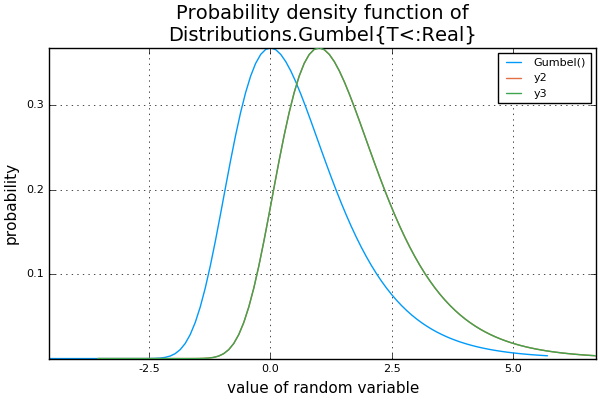

Could not plot the default Distributions.GeneralizedPareto{T<:Real}: DivideError().
Could not create Distributions.Geometric{T<:Real} (1): ArgumentError("Geometric: the condition zero(p) < p < one(p) is not satisfied.").
Geometric: the condition zero(p) < p < one(p) is not satisfied..
Could not plot the default Distributions.Hypergeometric: BoundsError(RecipesBase.RecipeData[],(1,)).



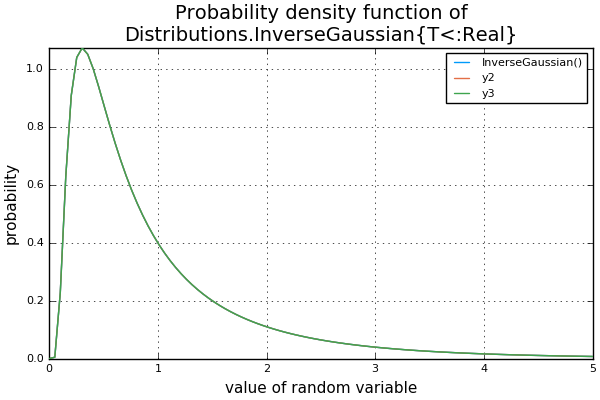

Could not plot the default Distributions.InverseGamma{T<:Real}: DivideError().



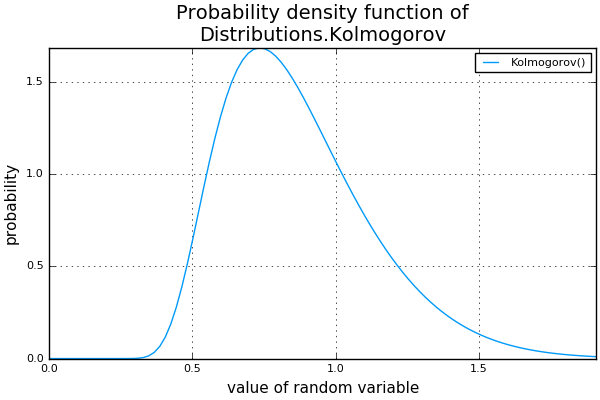


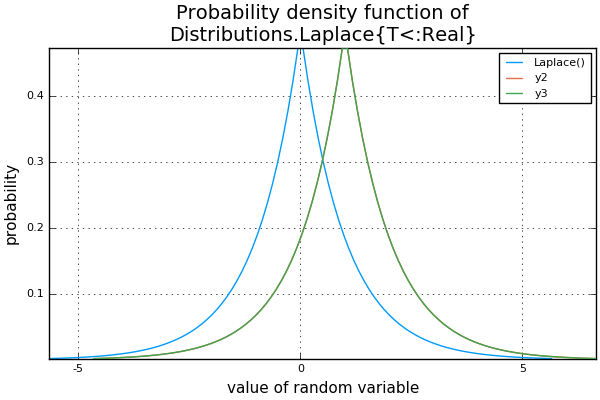

Could not create Distributions.InverseWishart{T<:Real,ST<:PDMats.AbstractPDMat} (1, 11): MethodError(Distributions.InverseWishart{T<:Real,ST<:PDMats.AbstractPDMat},(1,1)).
Could not plot the default Distributions.MvNormal{Float64,PDMats.ScalMat{Float64},Array{Float64,1}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.MvNormalCanon{Float64,PDMats.ScalMat{Float64},Array{Float64,1}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.KSDist: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.KSOneSided: BoundsError(RecipesBase.RecipeData[],(1,)).



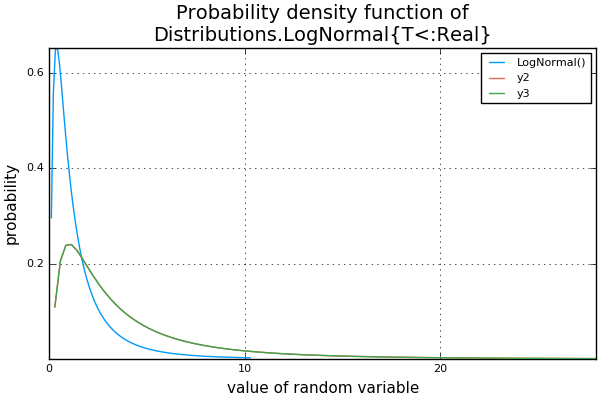


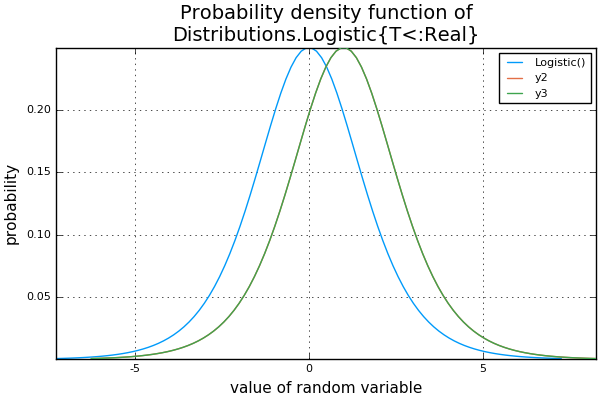

Could not plot the default Distributions.Levy{T<:Real}: DivideError().
Could not create Distributions.MAPEstimator{D<:Distributions.Distribution,Pri} (1, 11): MethodError(Distributions.MAPEstimator{D<:Distributions.Distribution,Pri},(1,1)).
Could not create Distributions.MLEstimator{D<:Distributions.Distribution} (1): MethodError(convert,(Distributions.MLEstimator{D<:Distributions.Distribution},1)).
Could not plot the default Distributions.Distribution{Distributions.Matrixvariate,S<:Distributions.ValueSupport}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Matrixvariate: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Matrixvariate,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Matrixvariate,).
Could not create Distributions.MixtureModel{VF<:Distributions.VariateForm,VS<:Distributions.ValueSupport,C<:Distributions.Distribution} (1, 11): MethodError(Distributions.MixtureMod


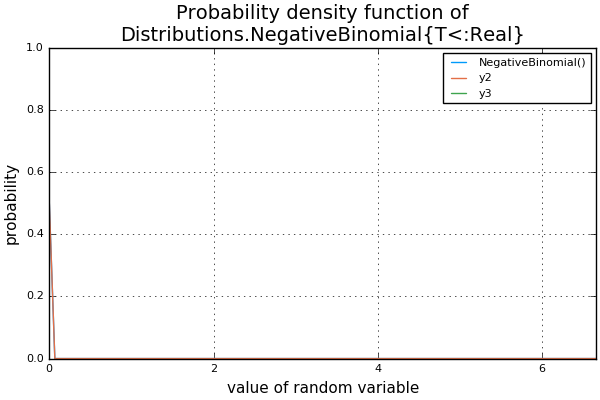

Could not plot the default Distributions.Multivariate: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Multivariate,)").
In convertToAnyVector, could not handle the argument types: (Distributions.Multivariate,).
Could not plot the default Distributions.Distribution{Distributions.Multivariate,S<:Distributions.ValueSupport}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.AbstractMixtureModel{Distributions.Multivariate,S<:Distributions.ValueSupport,C<:Distributions.Distribution}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.MvNormal{T<:Real,Cov<:PDMats.AbstractPDMat,Mean<:Union{Array{T,1},Distributions.ZeroVector}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not create Distributions.MvLogNormal{T<:Real,Cov<:PDMats.AbstractPDMat,Mean<:Union{Array{T,1},Distributions.ZeroVector}} (1): MethodError(convert,(Distributions.MvLogNormal{T<:Real,Cov<:PDMats.AbstractPDMat,M


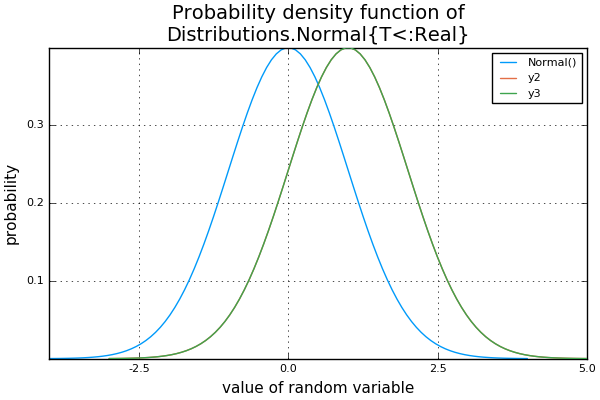


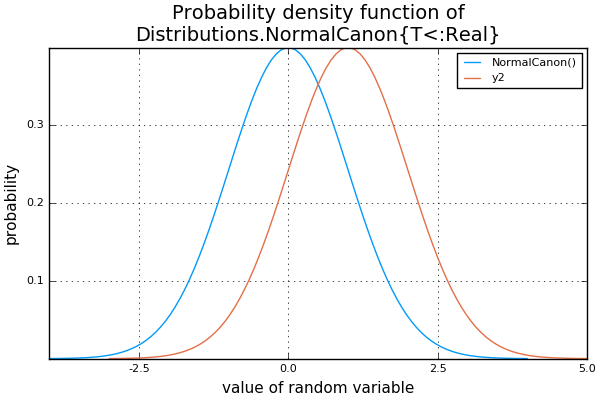

Could not plot the default Union{Distributions.Distribution{Distributions.Multivariate,S<:Distributions.ValueSupport},Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.NoncentralBeta{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.NoncentralChisq{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.NoncentralF{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.NoncentralHypergeometric{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.NoncentralT{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not access  (method exposed but not implemented): UndefVarError(:NormalGamma).
Could not access  (method exposed but not implemented): UndefVarError(:NormalInverseGamma).
Could not plot the de


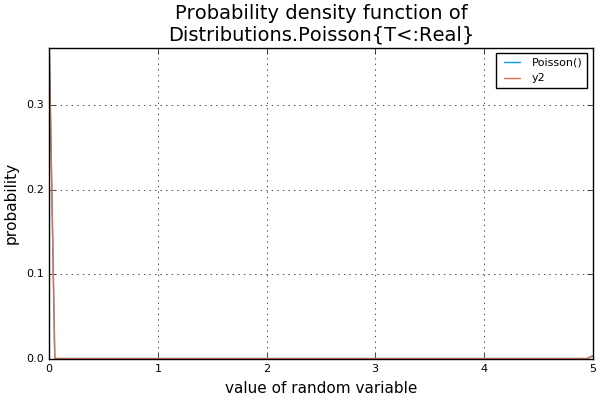

Could not plot the default Distributions.Pareto{T<:Real}: DivideError().



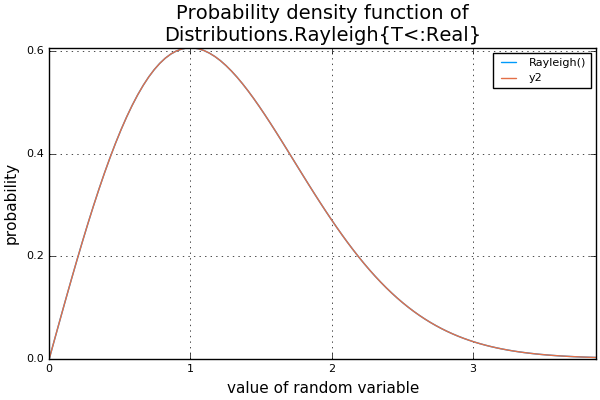

Could not create Distributions.PoissonBinomial{T<:Real} (1, 11): MethodError(Distributions.PoissonBinomial{T<:Real},(1,1)).
Could not create Distributions.QQPair (1, 11): MethodError(convert,(Array{Float64,1},1)).



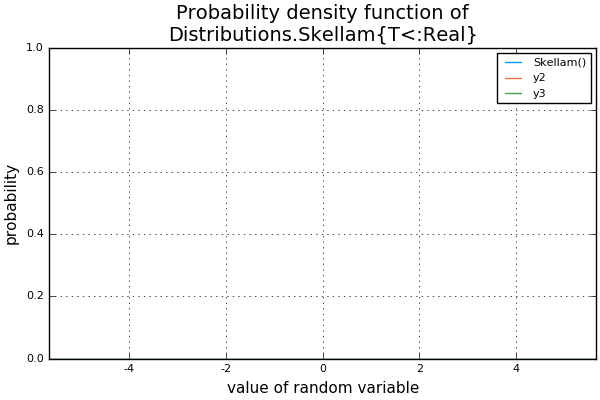

Could not plot the default Distributions.RealInterval: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.Sampleable{F<:Distributions.VariateForm,S<:Distributions.ValueSupport}: BoundsError(RecipesBase.RecipeData[],(1,)).



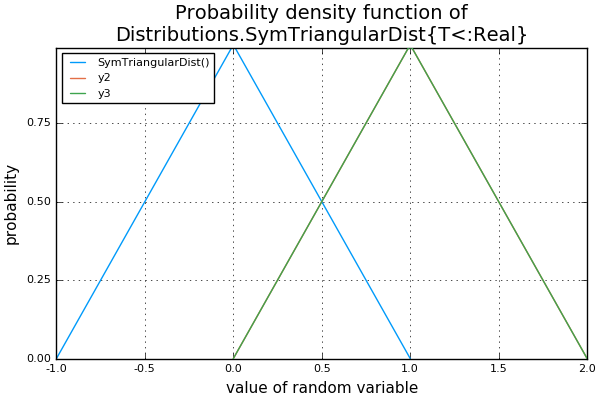

Could not plot the default Distributions.SufficientStats: BoundsError(RecipesBase.RecipeData[],(1,)).



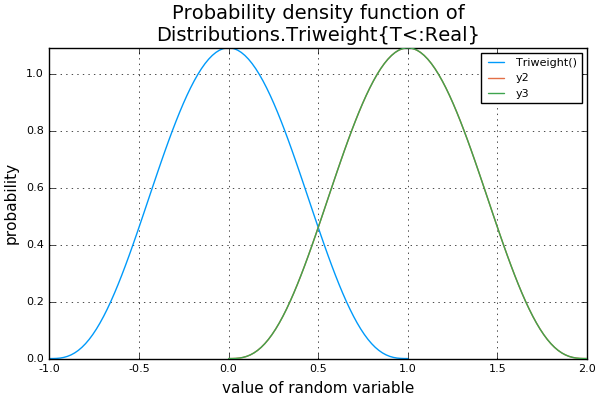

Could not plot the default Distributions.TDist{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not create Distributions.TriangularDist{T<:Real} (1, 11): ArgumentError("TriangularDist: the condition a < b is not satisfied.").
TriangularDist: the condition a < b is not satisfied..
Could not plot the default Distributions.Truncated{D<:Distributions.Distribution{Distributions.Univariate,S<:Distributions.ValueSupport},S<:Distributions.ValueSupport}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.TruncatedNormal: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not create Distributions.Uniform{T<:Real} (1, 11): ArgumentError("Uniform: the condition a < b is not satisfied.").
Uniform: the condition a < b is not satisfied..
Could not plot the default Distributions.Univariate: ErrorException("In convertToAnyVector, could not handle the argument types: (Distributions.Univariate,)").
In convertToAnyVector, could not handle the argument types: (Di


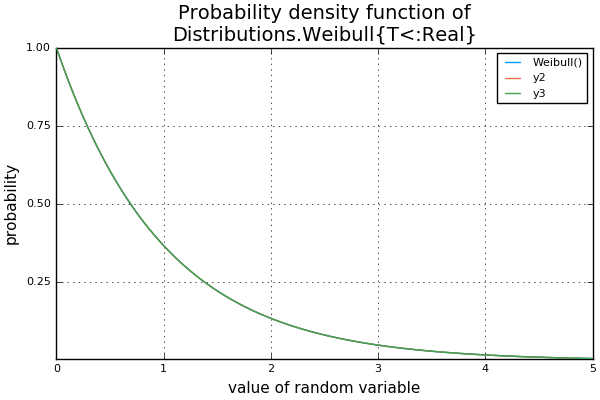

Could not plot the default Distributions.VonMises{T<:Real}: MethodError(start,(Distributions.VonMises{Float64}(μ=0.0, κ=1.0),)).
Could not create Distributions.VonMisesFisher{T<:Real} (1, 11): MethodError(Distributions.VonMisesFisher{T<:Real},(1,1)).
Could not plot the default Distributions.WalleniusNoncentralHypergeometric{T<:Real}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not create Distributions.Wishart{T<:Real,ST<:PDMats.AbstractPDMat} (1, 11): MethodError(Distributions.Wishart{T<:Real,ST<:PDMats.AbstractPDMat},(1,1)).
Could not plot the default Distributions.MvNormal{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Distributions.ZeroVector{Float64}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.MvNormalCanon{Float64,PDMats.PDiagMat{Float64,Array{Float64,1}},Distributions.ZeroVector{Float64}}: BoundsError(RecipesBase.RecipeData[],(1,)).
Could not plot the default Distributions.MvNormal{Float64,PDMats.PDMat{Float64,Array{Float64,2}},

In [10]:
for d in d_names
    method_name = ""
    d_obj = nothing
    d_obj1 = nothing
    d_obj2 = nothing
    
    try
        method_name = getfield(Distributions, d)
    catch err
        println("Could not access $method_name (method exposed but not implemented): $err.")
        try
            println("$(err.msg).")
        end
        continue
    end
    
    L = list_num_args_in_ctors(d)
    if 0 in L
        try
            d_obj = method_name()
        catch err
            println("Could not create a default $method_name: $err.")
            try
                println("$(err.msg).")
            end
            continue
        end
    end
    if 1 in L
        try
            d_obj1 = method_name(1)
        catch err
            println("Could not create $method_name (1): $err.")
            try
                println("$(err.msg).")
            end
            continue
        end
    end
    if 2 in L
        try
            d_obj2 = method_name(1, 1)
        catch err
            println("Could not create $method_name (1, 11): $err.")
            try
                println("$(err.msg).")
            end
            continue
        end
    end
    
    try
        p = plot(d_obj,
            title="Probability density function of\n" * string(method_name),
            xlabel="value of random variable",
            ylabel="probability",
            label="$d()",
        )
        if 1 in L
            try
                plot!(d_obj1)
            catch err1
                println("Could not plot $method_name (1): $err1.")
                try
                    println("$(err1.msg).")
                end
            end
        end
        if 2 in L
            try
                plot!(d_obj2)
            catch err2
                println("Could not plot $method_name (1, 1): $err2.")
                try
                    println("$(err2.msg).")
                end
            end
        end
        display(p)
    catch err
        println("Could not plot the default $method_name: $err.")
        try
            println("$(err.msg).")
        end
        continue
    end
end


In [12]:
# export this notebook as HTML to index.html
cmd = `jupyter nbconvert --to html DistributionsPlot.jl.ipynb --stdout`
run(pipeline(cmd, stdout="index.html"))

[NbConvertApp] Converting notebook DistributionsPlot.jl.ipynb to html
